# **Feature Engineering**: Selection

As previously discussed, the first step in a machine learning pipeline is data preparation. In previous notebooks we have discussed <ins>outliers</ins>, <ins>imputation</ins>, <ins>encoding</ins>, and <ins>transformation</ins>. An eager approach would be to feed right away the prepared data to estimators. In some situations, that is possible and could be done. Most often, however, providing estimators raw features is not advisable, either because the number of features is too large (e.g. due to one-hot encoding) or the information they convey is redundant. 

**Feature Engineering** is the Machine Learning pipeline step where we select the <ins>most relevant features</ins>, or even produce new features that are a better representation of the information conveyed by the original ones. Two sets of approaches can be adopted:
- **Selection:** a subset of the original features is selected.
- **Extraction:** new features are produced from the original ones.

In other words, feature engineering is the process before estimating and predicting the data. The main idea is to extract features, via data mining techniques, that better represent the problem to the predictive models, resulting in improved model accuracy.

If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. Sometimes, removing the unwanted feature is also feature engineering. As the feature which is not related degrade the performance of the model. [Ref. 1](https://medium.com/mindorks/what-is-feature-engineering-for-machine-learning-d8ba3158d97a)

In this notebook, we'll discuss **Feature Selection** approaches, particularly the ones provided by scikit-learn. 

Feature selection techniques can be used to find predictors that contain the most information. In machine learning and statistics, feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for several reasons [Ref. 2](https://en.wikipedia.org/wiki/Feature_selection):
1. Simplification of models to make them easier to be interpreted;
2. Shorter training times;
3. To avoid dimensionality (redundancy);
4. Enhanced generalization by reduction of variance.

In a nutshell, these methods can be categorized as *filter*, *wrapper*, or *embedded*. To understand these from a practical perspective, let's load the Boston house price prediction dataset provided by scikit-learn:

In [ ]:
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The data is provided as a structure where the `data` and `feature_names` attributes respectively represent the input characteristics and their names, and the `target` attribute represents the characteristic to be predicted (median market value):

In [ ]:
X = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
y = pd.Series(boston_data.target, index = X.index, name = "MEDV")
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## **Filter** Approaches

This kind of approach is based on <ins>thresholds</ins>, as only properties of the given characteristic are used to determine whether it should be selected or not. Filter methods suppress the least interesting variables to ensure the best subset.  

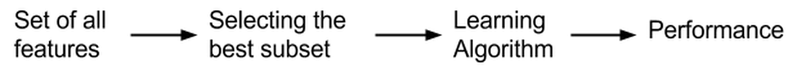

Basic schematic of filter approaches [Ref. 2](https://en.wikipedia.org/wiki/Feature_selection)

The most trivial example is discarding based on missing values, as we discussed before. This can be done directly with Pandas, using the `dropna()` method with the `thresh` parameter. Let's see if this would apply to our case:

In [ ]:
X.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Well, as with toy datasets, no missing values! Let's anyway show how this would work, if we had to do it:

In [ ]:
n_samples = X.shape[0] # 506
X.dropna(axis=1, thresh=0.1 * n_samples) # Treshold for missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


The code above removes all features for which over **90%** of the values are missing. 

> Note that the approach above is not compatible with scikit-learn pipelines, so it should be applied even before data preparation ;)

A second example of filter approach is based on variance, which filters out features for which the variance is below a given threshold. The variance filter is provided by scikit-learn as the `VarianceThreshold` resource. Let's apply this filter to our data: 

In [ ]:
X.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
dtype: float64

> Hmm.. The variations are quite spread out, so how can we set a common threshold? 

Remember that feature selection usually comes after data preparation, so at that point your numerical features should have unit standard deviation (which also means unit variance). Let's set the threshold to 0.1, to ensure only features with at least **10%** variance will be preserved:

> In the code below, we get the preserved column names using the `get_support()` method. This method provides a series of boolean values that we can use to identify which columns have been kept and which have been discarded.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline

var_selector = VarianceThreshold(threshold=0.1)
pipe = make_pipeline(MinMaxScaler(),
                     StandardScaler(),
                     var_selector)

pipe.fit(X)
column_mask = var_selector.get_support()
pd.DataFrame(pipe.transform(X), 
             columns=X.columns[column_mask])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


Note that the no features have been discarded with a 0.1 threshold, this means that no feature has less than 10% variance. Since we don't have many features, there's no need to increase this threshold here.

## **Wrapper** Approaches


This family of approaches builds models to understand feature importance. Wrapper methods evaluate subsets of variables which allows to detect the possible interactions between variables.

Overall, they can be categorized as **uni-** or **multivariate**.

### Univariate Selection

Univariate selection is done using statistical tests on individual features. Test scores are used as measures of feature importance, allowing an absolute or relative number of features to be retrieved. Scikit-learn offers two resources for selection:

- Absolute number of features: `SelectKBest`
- Relative number of features: `SelectPercentile`

Let's see a practical example using two different statistical tests:

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
kbest_selector = SelectKBest(f_regression, 5)
pd.DataFrame(kbest_selector.fit_transform(X, y), 
             columns=X.columns[kbest_selector.get_support()])

,INDUS,RM,TAX,PTRATIO,LSTAT
0,2.31,6.575,296.0,15.3,4.98
1,7.07,6.421,242.0,17.8,9.14
2,7.07,7.185,242.0,17.8,4.03
3,2.18,6.998,222.0,18.7,2.94
4,2.18,7.147,222.0,18.7,5.33
...,...,...,...,...,...
501,11.93,6.593,273.0,21.0,9.67
502,11.93,6.120,273.0,21.0,9.08
503,11.93,6.976,273.0,21.0,5.64
504,11.93,6.794,273.0,21.0,6.48


Let's discuss the example above for a minute. The statistical test applied is one of the options provided by scikit-learn for regression problems. It is based on the correlation between each characteristic and the target characteristic, so we have to provide `y` as an argument to `fit_transform`.

Let's compare the selected features above with the correlation map between input and target features to see that they match:

> If you missed the episode on cluster maps, check [pandas-zero](https://github.com/leobezerra/pandas-zero).

<Figure size 864x720 with 0 Axes>

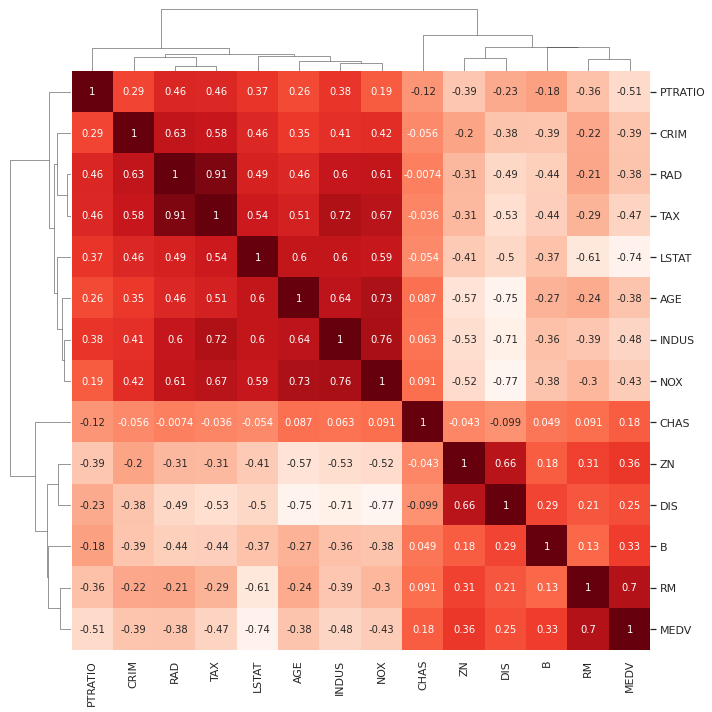

In [ ]:
import matplotlib.pyplot as plt

full_data = pd.concat([X, y], axis=1)

plt.figure(figsize=(12,10))
sns.clustermap(full_data.corr(), annot=True, cmap="Reds", 
               cbar_pos=None, dendrogram_ratio=0.1, fmt='.2g')
plt.show()

Note that the five features that are best correlate with the target feature are indeed `LSTAT` (-0.74), `RM`(0.7), `PTRATIO` (-0.51), `INDUS` (-0.48), and `TAX` (-0.47). We could have, instead, provided a statistical test based on mutual information between the input and target features.

Let's see how that works, but selecting a relative number of features:

In [ ]:
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
percentile_selector = SelectPercentile(mutual_info_regression, 50) # 50% FEATURES MAIS RELEVANTES
pd.DataFrame(percentile_selector.fit_transform(X, y), 
             columns=X.columns[percentile_selector.get_support()])

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,296.0,15.3,4.98
1,7.07,0.469,6.421,242.0,17.8,9.14
2,7.07,0.469,7.185,242.0,17.8,4.03
3,2.18,0.458,6.998,222.0,18.7,2.94
4,2.18,0.458,7.147,222.0,18.7,5.33
...,...,...,...,...,...,...
501,11.93,0.573,6.593,273.0,21.0,9.67
502,11.93,0.573,6.120,273.0,21.0,9.08
503,11.93,0.573,6.976,273.0,21.0,5.64
504,11.93,0.573,6.794,273.0,21.0,6.48


Scikit-learn offers several other statistics for regression and classification problems, but they would exceed the scope of this notebook. Let's move on to Multivariate Approaches.

### **Multivariate** selection

Approaches that build models from multiple input features are called multivariate. 


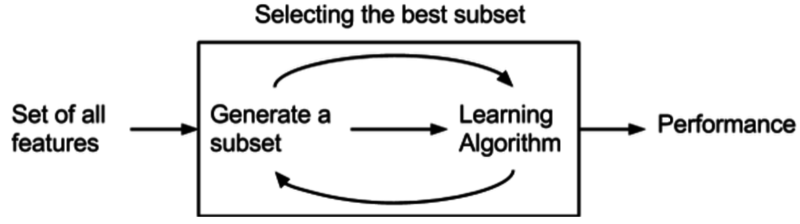

Basic schematic of multivariate wrapper approaches [Ref. 2](https://en.wikipedia.org/wiki/Feature_selection)

Selection based on multivariate approaches can be done at a one-shot pass, or iteratively.

#### One-shot selection

One-shot multivariate approaches fit a single model and select features based on the importance assigned by these model to each feature. Scikit-learn provides a handful of estimators that assign feature importance internally, and can then be used for this type of selection. Let's see a pratical example of that:

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
oneshot_selector = SelectFromModel(RandomForestRegressor())
pd.DataFrame(oneshot_selector.fit_transform(X, y), 
             columns=X.columns[oneshot_selector.get_support()])

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


> That was brutal!

Let's understand what happened. First, we provided a random forest estimator to the `SelectFromModel` selector. Random forests are among the most used estimators for feature selection, as well as the following options:

| Approach | Regression | Classification |
| --- | --- | --- |
| L1-norm | `Lasso`, `SVR` | `LogisticRegression`, `SVC` | 
| Tree-based | `ExtraTreesRegressor`  | `ExtraTreesClassifier`
| | `RandomForestRegressor` | `RandomForestClassifier` | 

Still, using a given estimator doesn't imply directly at such a brutal feature reduction. That happened because we didn't configure a threshold, so `SelectFromModel` used the mean feature importance as selection threshold. Let's see what happens if we used the median feature importance, instead:

In [ ]:
oneshot_selector = SelectFromModel(RandomForestRegressor(),
                                   threshold="median")
pd.DataFrame(oneshot_selector.fit_transform(X, y), 
             columns=X.columns[oneshot_selector.get_support()])

,CRIM,NOX,RM,DIS,PTRATIO,B,LSTAT
0,0.00632,0.538,6.575,4.0900,15.3,396.90,4.98
1,0.02731,0.469,6.421,4.9671,17.8,396.90,9.14
2,0.02729,0.469,7.185,4.9671,17.8,392.83,4.03
3,0.03237,0.458,6.998,6.0622,18.7,394.63,2.94
4,0.06905,0.458,7.147,6.0622,18.7,396.90,5.33
...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,2.4786,21.0,391.99,9.67
502,0.04527,0.573,6.120,2.2875,21.0,396.90,9.08
503,0.06076,0.573,6.976,2.1675,21.0,396.90,5.64
504,0.10959,0.573,6.794,2.3889,21.0,393.45,6.48


Note that now we get about half of the features, and that they are not necessarily a superset of the features we would get with univariate selection. It's also possible to set a maximum number of features to be returned, using parameter `max_features`:

In [ ]:
oneshot_selector = SelectFromModel(RandomForestRegressor(),
                                   threshold="median",
                                   max_features=5)
pd.DataFrame(oneshot_selector.fit_transform(X, y), 
             columns=X.columns[oneshot_selector.get_support()])

,CRIM,NOX,RM,DIS,LSTAT
0,0.00632,0.538,6.575,4.0900,4.98
1,0.02731,0.469,6.421,4.9671,9.14
2,0.02729,0.469,7.185,4.9671,4.03
3,0.03237,0.458,6.998,6.0622,2.94
4,0.06905,0.458,7.147,6.0622,5.33
...,...,...,...,...,...
501,0.06263,0.573,6.593,2.4786,9.67
502,0.04527,0.573,6.120,2.2875,9.08
503,0.06076,0.573,6.976,2.1675,5.64
504,0.10959,0.573,6.794,2.3889,6.48


> Check the documentation on `SelectFromModel` to see how to configure selection based only on `max_features`!

#### Iterative selection

In contrast to one-shot selection, where feature importance is computed from a single model, iterative selection creates as many models as the number of features to be preserved/discarded. In scikit-learn, the `RFE` (recursive feature elimination) selector iteratively discard the least important feature: 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

iterative_selector = RFE(estimator=Lasso())
pd.DataFrame(iterative_selector.fit_transform(X, y), 
             columns=X.columns[iterative_selector.get_support()])

,CRIM,ZN,RM,DIS,PTRATIO,LSTAT
0,0.00632,18.0,6.575,4.0900,15.3,4.98
1,0.02731,0.0,6.421,4.9671,17.8,9.14
2,0.02729,0.0,7.185,4.9671,17.8,4.03
3,0.03237,0.0,6.998,6.0622,18.7,2.94
4,0.06905,0.0,7.147,6.0622,18.7,5.33
...,...,...,...,...,...,...
501,0.06263,0.0,6.593,2.4786,21.0,9.67
502,0.04527,0.0,6.120,2.2875,21.0,9.08
503,0.06076,0.0,6.976,2.1675,21.0,5.64
504,0.10959,0.0,6.794,2.3889,21.0,6.48


In statistics and ML, Lasso (least absolute shrinkage and selection operator) estimator provides a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. [Ref. 3](https://en.wikipedia.org/wiki/Lasso_(statistics))

The `RFE` selector can be configured as to the total number of features to select and to the number of features to discard at each iteration:

In [ ]:
iterative_selector = RFE(estimator=Lasso(),
                         n_features_to_select=5,
                         step=2)
pd.DataFrame(iterative_selector.fit_transform(X, y), 
             columns=X.columns[iterative_selector.get_support()])

,CRIM,RM,DIS,PTRATIO,LSTAT
0,0.00632,6.575,4.0900,15.3,4.98
1,0.02731,6.421,4.9671,17.8,9.14
2,0.02729,7.185,4.9671,17.8,4.03
3,0.03237,6.998,6.0622,18.7,2.94
4,0.06905,7.147,6.0622,18.7,5.33
...,...,...,...,...,...
501,0.06263,6.593,2.4786,21.0,9.67
502,0.04527,6.120,2.2875,21.0,9.08
503,0.06076,6.976,2.1675,21.0,5.64
504,0.10959,6.794,2.3889,21.0,6.48


### Adding wrappers to the pipeline

As we have discussed before, everything that happens in machine learning is part of a pipeline. In scikit-learn, wrapper selectors should also be added to pipelines, as we did with data preparation. Let's see how that would work using two selectors:

In [ ]:
prep_sel_pipe = make_pipeline(MinMaxScaler(),
                              StandardScaler(),
                              iterative_selector
                              )

prep_sel_pipe.fit(X, y)
column_mask = iterative_selector.get_support()
pd.DataFrame(prep_sel_pipe.transform(X), columns=X.columns[column_mask])

,RM,TAX,PTRATIO,B,LSTAT
0,0.413672,-0.666608,-1.459000,0.441052,-1.075562
1,0.194274,-0.987329,-0.303094,0.441052,-0.492439
2,1.282714,-0.987329,-0.303094,0.396427,-1.208727
3,1.016303,-1.106115,0.113032,0.416163,-1.361517
4,1.228577,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...
501,0.439316,-0.803212,1.176466,0.387217,-0.418147
502,-0.234548,-0.803212,1.176466,0.441052,-0.500850
503,0.984960,-0.803212,1.176466,0.441052,-0.983048
504,0.725672,-0.803212,1.176466,0.403225,-0.865302


Note that preserving feature names gets trickier with the addition of more components to the pipeline. To do that, we get the masks provided by each selector and combine them using the and operator `&`.

> 
> Scikit-learn should make this easier!

## **Embedded** Approaches

In filter and wrapper approaches, feature selection is a step that comes prior to estimation (even if wrapper approaches use auxiliary model fitting). In embedded approaches, feature selection is done internally by the estimator during model fitting. Not all estimators provide this possibility, though. 

A learning algorithm takes advantage of its own variable selection process and performs feature selection and classification simultaneously.

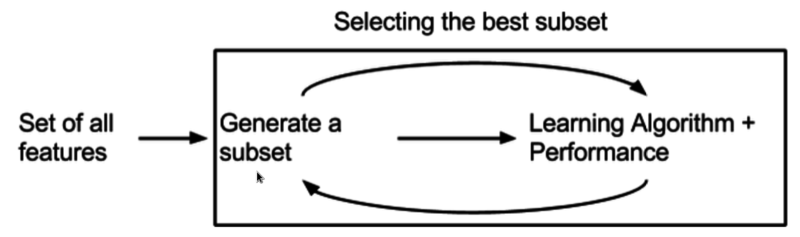

Basic schematic of embedded approaches [Ref. 2](https://en.wikipedia.org/wiki/Feature_selection)

Besides the estimators discussed in the wrapper approach section, another estimator that deserves to be mentioned is the **Multi-layer Perceptron**. Below we discuss a bit how this is done by different estimators:

### L1-norm regularization

Some algorithms, such as (generalized) linear models or support vector machines, make use of penalty factors to prevent models from overfitting to data. When the regularization approach is based on the <ins>L1-norm</ins>, which is also called "Manhattan distance", features may actually get ruled out of model fitting.

Manhattan distance is a metric in which the distance between two points is the sum of the absolute differences of their Cartesian coordinates. In a simple way of saying it is the total sum of the difference between the x-coordinates and y-coordinates. [Ref.4](https://medium.com/analytics-vidhya/various-types-of-distance-metrics-machine-learning-cc9d4698c2da#:~:text=Manhattan%20distance%20is%20a%20metric,%2Dcoordinates%20and%20y%2Dcoordinates.)

Scikit-learn offers several estimators that implement L1-norm regularization, among which we highlight the following. For each estimator in the table below, we highlight whether it can be applied to regression or classification, which hyperparameter configures its regularization level, and whether the relation between the hyperparameter and the regularization level is direct or inverse (if direct, the higher the value of the hyperparameter, the higher the regularization level).

| Estimator | Regression | Classification | Hyperparameter | Direct/Inverse |
| --- | --- | --- | --- | --- |
| `Lasso` | ✔️| ❌ | `alpha` | direct |
| `LogisticRegression` | ❌| ✔️| `C`  | inverse


### **Forests**

Decision trees are among the simplest machine learning estimators, and indeed their predictive power is often surpassed in practice by other estimators. The basic principle behind decision trees is selecting features incrementally according to their predictive power. Effectively, decision trees are the simplest embedded feature selection example. The more robust versions of decision trees, forests, preserve this benefit while providing better predictive performance than traditional decision trees. Scikit-learn offers a handful of forest-based estimators, among which we highlight `RandomForestRegressor` and `RandomForestClassifier`. However, configuring the feature selection nature of random forests is a more complex task, since it involves multiple hyperparameters.

### **Neural networks**

Neural networks comprise a large estimator family that became popular thanks to the multi-layer perceptron (MLP). In this type of neural network, features are input to a series of neurons aligned in layers, and the processing conducted in consecutive layers determines the network output. Since each neuron can weight the importance of the information it is fed as input, some features may have their importance zeroed by the network. Scikit-learn is a not a library specialized in neural networks, but it offers the `MLPRegressor` and `MLPClassifier` estimators. Configuring neural networks is far more complex than configuring forest-based estimators. 

> Actually, configuring any machine learning pipeline is a complex task. We'll dedicate a whole notebook to that later :)

## A critical discussion

The several selection approaches discussed here offer different trade-offs between the information level used for selection and the computational cost required to produce that information level. In principle, embedded approaches should be preferred if the application domain is favorable to those estimators. Next, filter approaches are the computationally cheapest, but their selection capabilities are quite limited. Lastly, wrapper approaches are a very interesting alternative, with the particular methods for model fitting and selection being decided as a function of the problem one has at hand. An important thing to remember when using wrapper approaches, though, is to use cheap-to-compute auxiliary estimators, specially in iterative approaches.

It is also important to remember that one can look at different selection approaches from a complementary perspective, rather than as mutually exclusive alternatives. It is not only possible to combine any two of the options discussed here, but the three altogether. The need for that is problem-specific, and experimental analysis is a powerful ally to state when to use which :)